In [163]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from output, most of these features look like the encoding will be straightforward

In [164]:
df = pd.read_csv("train.csv")

df.head(15)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

[EDA] - not really sure how to do this !


first i will inspect the distribution of Sale Price

Text(0.5, 0, 'Sale Price')

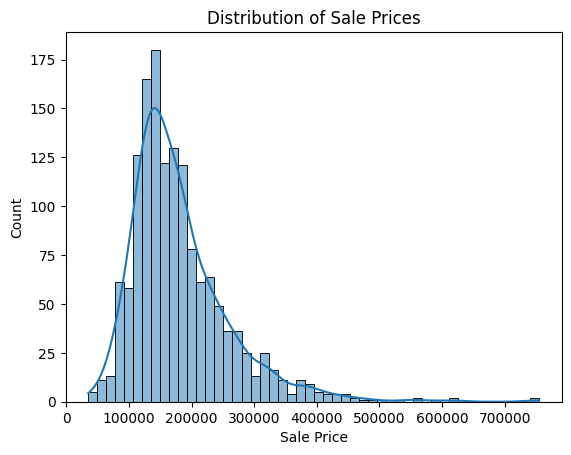

In [165]:
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')    

right skewed

looking at null values

In [166]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])
print("number of features with null values is ",len(nulls[nulls >0]), "!")
#1459 rows total 


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
number of features with null values is  19 !


features with large amounts of missing values: PoolQC, Fence, MiscFeature, Alley

inspect further


Alley: Type of alley access 

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories


guess that the reason the number of null values for these features is so high is due to the fact they are not applicable (house does not have pool)

In [167]:
# lotNA = ['PoolQC', 'Fence', 'MiscFealotNA = ture', 'Alley', 'FireplaceQu', 'MasVnrType']

# fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# for ax, feature in zip(axes.flat, lotNA):
#     sns.countplot(x=df[feature], ax=ax)
#     ax.set_title(feature)
# plt.tight_layout()
# plt.show()




In [168]:
print(df['PoolQC'].value_counts())
print(df['Fence'].value_counts())
print(df['MiscFeature'].value_counts())
print(df['FireplaceQu'].value_counts())
print(df['MasVnrType'].value_counts())
print(df['PoolQC'].value_counts())



PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64


miscfeature and 'MasVnrType' can be encoded using one hot encoding use ordinal encoding for the rest


In [169]:

#for MasVnrType dont want a column for NaN since if the material is unknwon then it doesn't provide any
#useable/interpretable information, set dummy_na to false
#also set false for MiscFeature since there are only a handful of non Nan values
df = pd.get_dummies(df, columns=['MasVnrType'], dummy_na=False)
df = pd.get_dummies(df, columns=['MiscFeature'], dummy_na=False)

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,208500,False,True,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,181500,False,False,False,False,False,False,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,223500,False,True,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,WD,Abnorml,140000,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,250000,False,True,False,False,False,False,False


In [170]:
poolqc_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NaN': 0}
fireplacequ_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN': 0}
alley_map = {'Pave': 2, 'Grvl': 1, 'NaN': 0}

#will encode fence like so since it has unique entries, can come back and edit in future
# if problems arise!

fence_map = {
    'GdPrv': 2, 'MnPrv': 2, 
    'GdWo': 1, 'MnWw': 1,    
    'NaN': 0                 
}
df['PoolQC'] = df['PoolQC'].fillna('NaN').map(poolqc_map)
df['FireplaceQu'] = df['FireplaceQu'].fillna('NaN').map(fireplacequ_map)
df['Alley'] = df['Alley'].fillna('NaN').map(alley_map)
df['Fence'] = df['Fence'].fillna('NaN').map(fence_map)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,WD,Normal,208500,False,True,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,WD,Normal,181500,False,False,False,False,False,False,False
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,WD,Normal,223500,False,True,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,WD,Abnorml,140000,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,WD,Normal,250000,False,True,False,False,False,False,False


need to encode the rest of the string columns...

find string columns that are easy to encode via one hot or ordinal encoding, since not sure how to encode more complex string columns yet

In [171]:
cat_cols = df.select_dtypes(include=['object']).columns
print(df[['ExterQual',
       'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 
       'CentralAir','KitchenQual', 
       'GarageQual', 'GarageCond',]])

encode = ['ExterQual',
       'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 
       'CentralAir','KitchenQual', 
       'GarageQual', 'GarageCond',]

     ExterQual ExterCond BsmtQual BsmtCond BsmtExposure CentralAir  \
0           Gd        TA       Gd       TA           No          Y   
1           TA        TA       Gd       TA           Gd          Y   
2           Gd        TA       Gd       TA           Mn          Y   
3           TA        TA       TA       Gd           No          Y   
4           Gd        TA       Gd       TA           Av          Y   
...        ...       ...      ...      ...          ...        ...   
1455        TA        TA       Gd       TA           No          Y   
1456        TA        TA       Gd       TA           No          Y   
1457        Ex        Gd       TA       Gd           No          Y   
1458        TA        TA       TA       TA           Mn          Y   
1459        Gd        TA       TA       TA           No          Y   

     KitchenQual GarageQual GarageCond  
0             Gd         TA         TA  
1             TA         TA         TA  
2             Gd         TA         

In [172]:

one_hot = []
ordinal = []
one_h = 0
ord = 0
for x in encode:
    if len(df[x].value_counts()) == 2:
        one_h += 1
        one_hot.append(x)
        print(f"adding --{x}-- to ONE-HOT list...")
    elif len(df[x].value_counts()) > 2:
        ord += 1
        ordinal.append(x)
        print(f"adding --{x}-- to ordinal list...")
    else:
        print(f"{x} didnt fit into any category!!")

print("\nSUMMARY:\n", "="*60)
print(f"one hot columns: {one_h}")
print(f"ordinal columns: {ord}")

print(ordinal)


adding --ExterQual-- to ordinal list...
adding --ExterCond-- to ordinal list...
adding --BsmtQual-- to ordinal list...
adding --BsmtCond-- to ordinal list...
adding --BsmtExposure-- to ordinal list...
adding --CentralAir-- to ONE-HOT list...
adding --KitchenQual-- to ordinal list...
adding --GarageQual-- to ordinal list...
adding --GarageCond-- to ordinal list...

SUMMARY:
one hot columns: 1
ordinal columns: 8
['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'KitchenQual', 'GarageQual', 'GarageCond']


start with dummy encoding for CentralAir

In [173]:
df = pd.get_dummies(df, columns=['CentralAir'], dummy_na=True)


ordinal encoding for ordinal list

In [174]:
qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN': 0}
cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN': 0}
bsmtqual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN': 0}
bsmtcond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN': 0}
bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NaN': 0}
kitchenqual_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NaN': 0}
garagequal_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN': 0}
garagecond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN': 0}

df['ExterQual'] = df['ExterQual'].fillna('NaN').map(qual_map)
df['ExterCond'] = df['ExterCond'].fillna('NaN').map(cond_map)
df['BsmtQual'] = df['BsmtQual'].fillna('NaN').map(bsmtqual_map)
df['BsmtCond'] = df['BsmtCond'].fillna('NaN').map(bsmtcond_map)
df['BsmtExposure'] = df['BsmtExposure'].fillna('NaN').map(bsmt_exposure_map)
df['KitchenQual'] = df['KitchenQual'].fillna('NaN').map(kitchenqual_map)
df['GarageQual'] = df['GarageQual'].fillna('NaN').map(garagequal_map)
df['GarageCond'] = df['GarageCond'].fillna('NaN').map(garagecond_map)

df[ordinal].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,KitchenQual,GarageQual,GarageCond
0,4,3,4,3,1,3,3,3
1,3,3,4,3,4,2,3,3
2,4,3,4,3,2,3,3,3
3,3,3,3,4,1,3,3,3
4,4,3,4,3,3,3,3,3


[EDA]
as a side thought I want to compare the feature with alot of null values (PoolQC) with the othe Pool feature with not alot of null values (PoolArea)

start off by looking at what the data for PoolArea currently looks like

Text(0.5, 1.0, 'PoolArea Distribution')

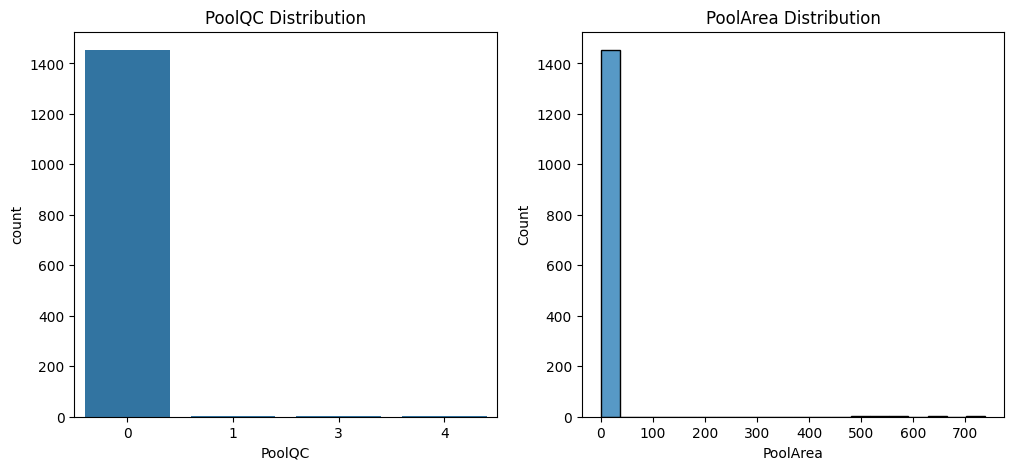

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='PoolQC', data=df, ax=axes[0])
axes[0].set_title('PoolQC Distribution')
sns.histplot(df['PoolArea'], bins=20, ax=axes[1])
axes[1].set_title('PoolArea Distribution')

# realized this is sort of unnescary as there aren't that many houses in 
# the dataset with pools to begin with but this confirms that NaN in poolQC is due
# to the fact the houses have no pools not due to other reasons such as data corruption

#TLDR yes, data lines

want to start predicting, 

start with cleaning the numeric columns and then training a model solely on that data, later will compare the performance with a model that contains the categorical columns too

first clean numeric data


deal with missing values

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
Alley              0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
ExterQual          0
ExterCond          0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu        0
GarageYrBlt       81
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
PoolQC             0
Fence              0
MiscVal            0
MoSold       

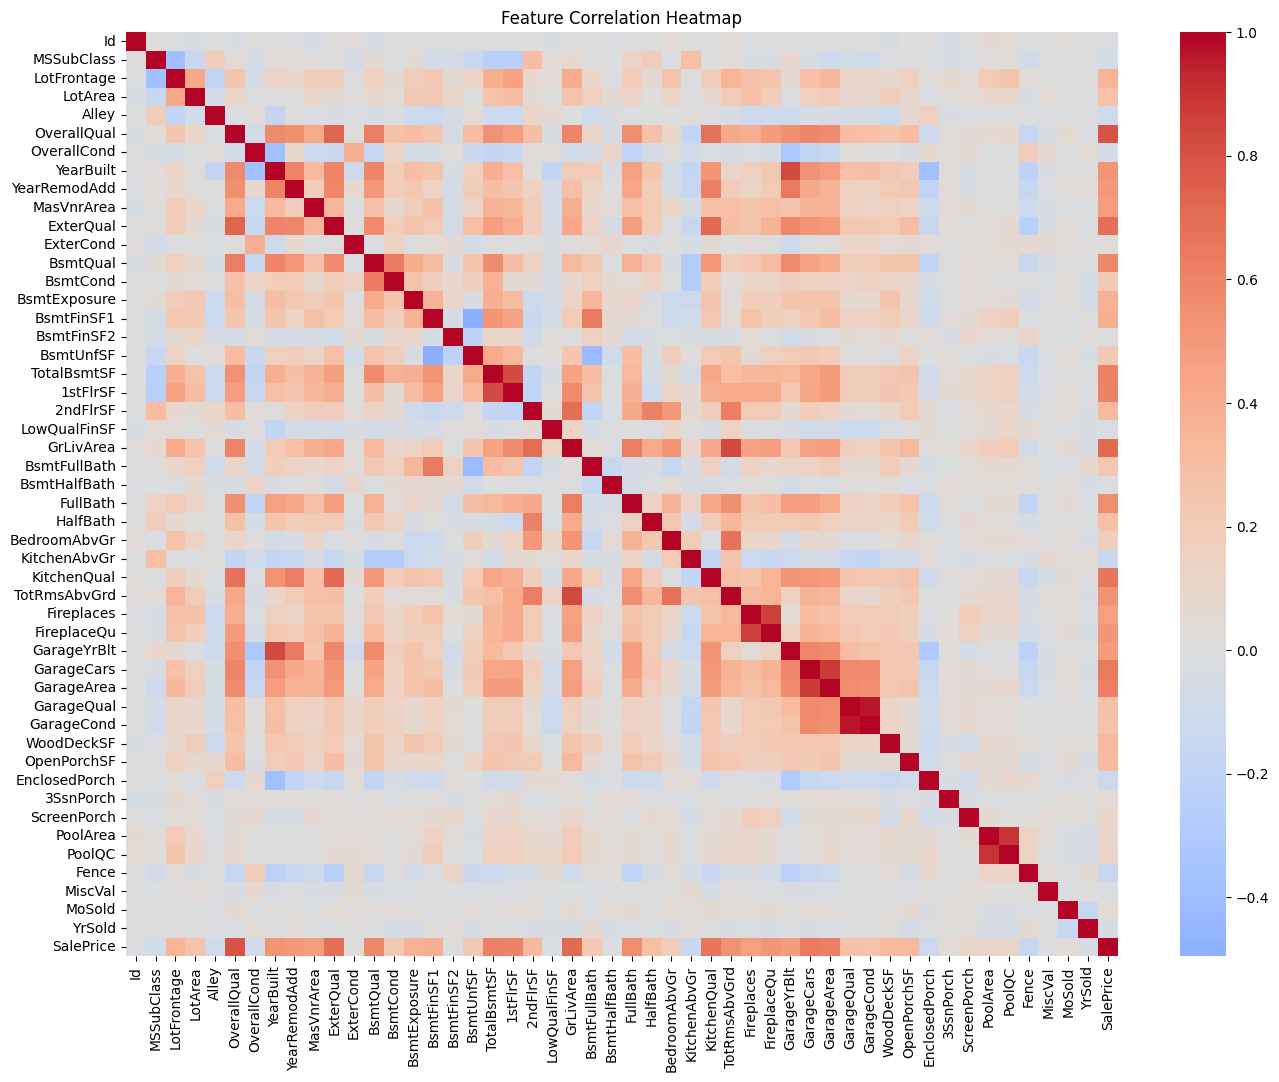

In [176]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(df[num_cols].isnull().sum())

# The features that contain missing values are:
# -- GarageYrBlt
# -- LotFrontage --  defined as Linear feet of street connected to property

# try to analyze and find the reason why
df[['GarageYrBlt', 'LotFrontage']].head()

#plot heatmap to look for features that may be related to this loss
corr = df[num_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


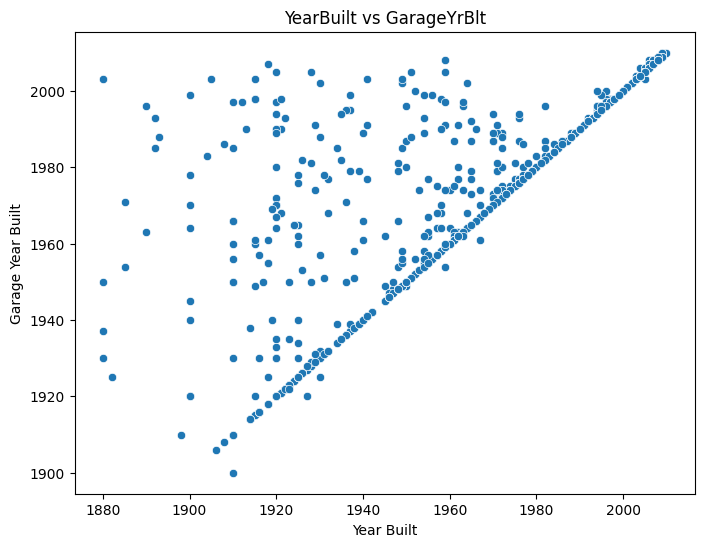

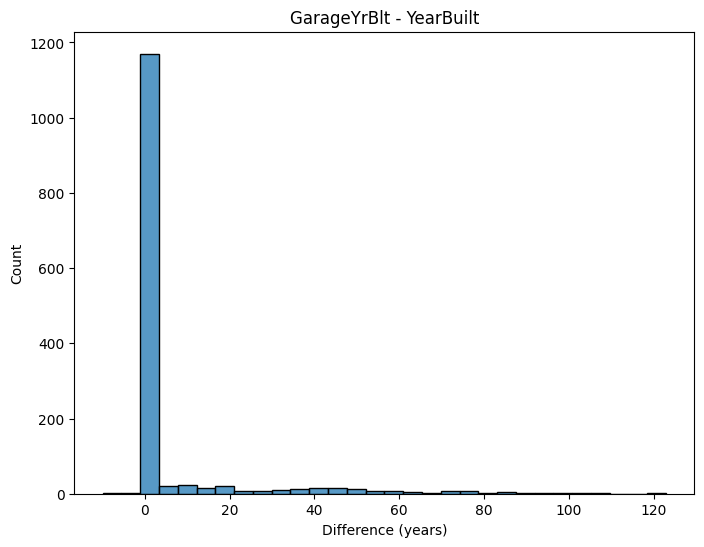

SUMMARY: ============================================================
the percentage of values that dont line up is 15.684931506849315%


In [177]:
#'GarageYrBlt' is most correlated to YearBuilt and GarageArea
#'LotFrontage' is most correlated to GrLivArea 1st and 2ndFlrSG

#first will examine GarageYrBlt
# guess: should be generally equivalent

# Scatter plot to visualize relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['YearBuilt'], y=df['GarageYrBlt'])
plt.xlabel('Year Built')
plt.ylabel('Garage Year Built')
plt.title('YearBuilt vs GarageYrBlt')
plt.show()

# Difference analysis
df['Garage_Year_Diff'] = df['GarageYrBlt'] - df['YearBuilt']
plt.figure(figsize=(8, 6))
sns.histplot(df['Garage_Year_Diff'].dropna(), bins=30)
plt.title('GarageYrBlt - YearBuilt')
plt.xlabel('Difference (years)')
plt.show()

# Observation: before 1900 year built != garageyrbuilt
# after apporx 1985 the two features line up almost exactly

print("SUMMARY:", "="*60)
print(f"the percentage of values that dont line up is {((df['Garage_Year_Diff'] > 1).mean()*100)}%")

#was gonna drop the column but decided to keep it to see if it can provide any insights later

In [178]:
df.loc[df['GarageYrBlt'].isnull(), ['GarageYrBlt', 'YearBuilt']].groupby('YearBuilt').size()

#null values are pretty spread out, looks like random error in data collection

#TODO: potential to do a fancy imputation method, for now move on (also didnt look at its relation to garage area)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

now looking at lotfrontage

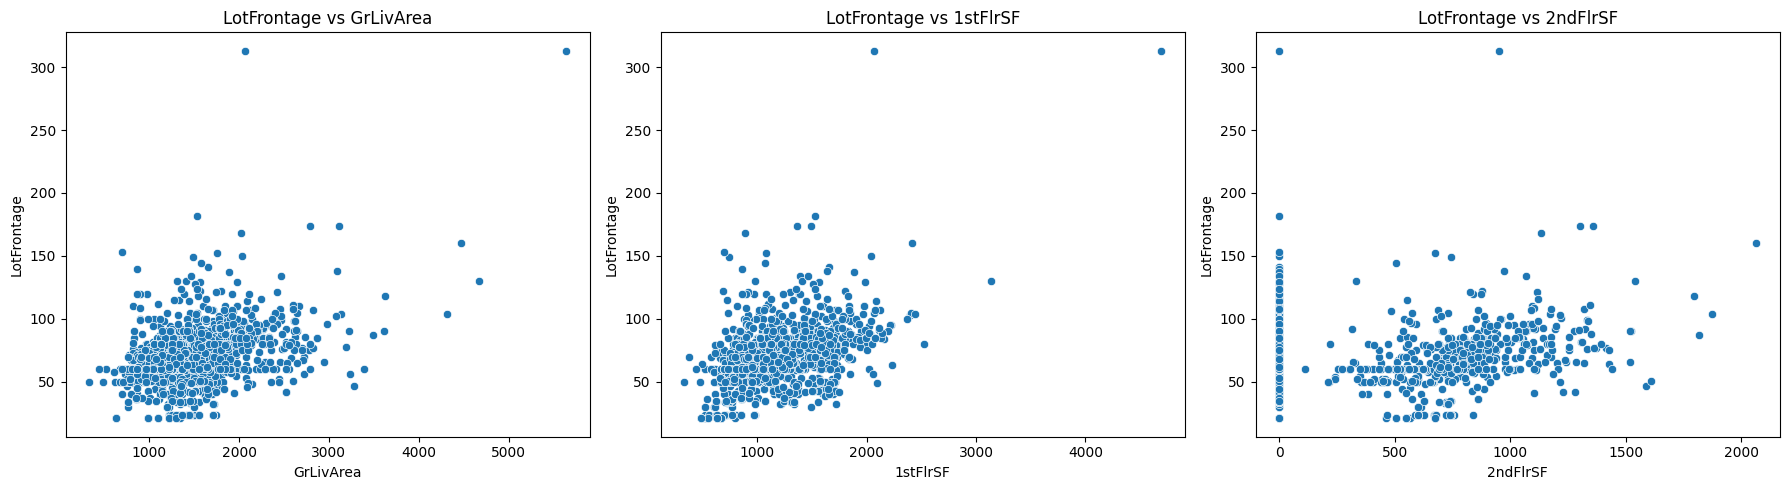

In [179]:
# Compare LotFrontage to GrLivArea, 1stFlrSF, and 2ndFlrSF using subplots
features = ['GrLivArea', '1stFlrSF', '2ndFlrSF']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, feature in zip(axes, features):
    sns.scatterplot(x=df[feature], y=df['LotFrontage'], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('LotFrontage')
    ax.set_title(f'LotFrontage vs {feature}')
plt.tight_layout()
plt.show()

#no strong correlation between features
# based on the defintion of lotfrontage it could be that the properties with missing
# values are just simply not connected to any road, will set to 0.

# sns.boxplot(x=df['YearBuilt'], y=df['LotFrontage'])
# plt.title('LotFrontage vs YearBuilt')
# plt.xlabel('YearBuilt')
# plt.ylabel('LotFrontage')
# plt.xticks(rotation=45)
# plt.show()


# df['LotFrontage'] = df['LotFrontage'].fillna(0)

# #for good measure graph against YrBuilt to see if the pattern is random
# sns.boxplot(x=df['YearBuilt'], y=df['LotFrontage'])
# plt.title('LotFrontage vs YearBuilt')
# plt.xlabel('YearBuilt')
# plt.ylabel('LotFrontage')
# plt.xticks(rotation=45)
# plt.show()

# BUT THEN I REALIZED THAT performing simple imputing drastically increased the
# lower outliers, try group imputation instead

### Group-based Imputation for LotFrontage
Instead of filling missing LotFrontage values with 0, use the median LotFrontage for each Neighborhood. This preserves the distribution and reduces artificial outliers.

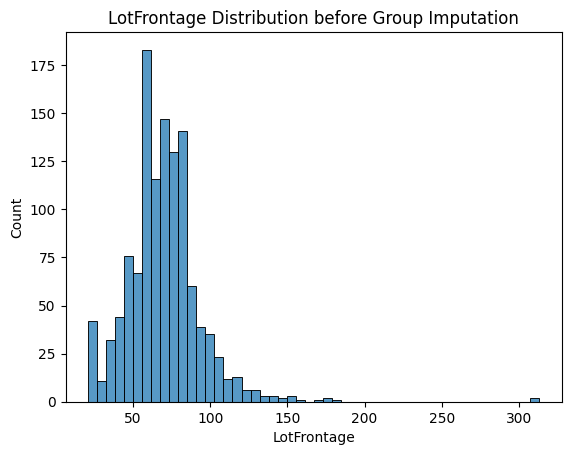

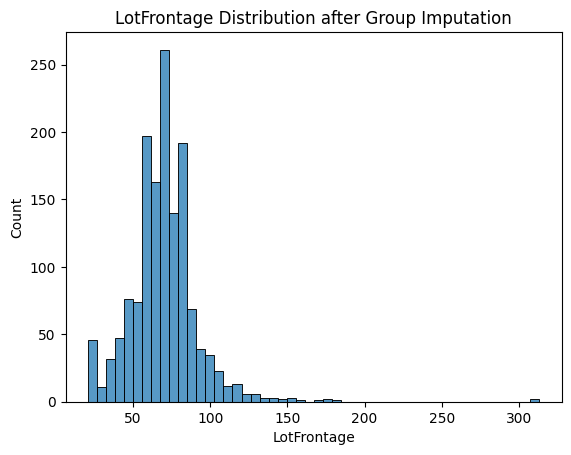

In [180]:
sns.histplot(df['LotFrontage'], bins=50)
plt.title('LotFrontage Distribution before Group Imputation')
plt.xlabel('LotFrontage')
plt.show()

#TODO: investigate this line
# Impute LotFrontage using the median value for each Neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Visualize the new distribution
sns.histplot(df['LotFrontage'], bins=50)
plt.title('LotFrontage Distribution after Group Imputation')
plt.xlabel('LotFrontage')
plt.show()



Final step in data cleaning/preprocessing is to remove outliers and standardize


In [181]:
# use IQR method

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

#TODO: investigate capping more
#using capping instead of removal to create a more robust model

#just gonna trust this removed some outliers..

want to start training models , can i assume linear relationship??

In [182]:
# Compact subplot grid: Numeric features vs SalePrice
# import math
# n = len(num_cols)
# cols = 3
# rows = math.ceil(n / cols)
# fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
# axes = axes.flatten()
# for i, col in enumerate(num_cols):
#     axes[i].scatter(df[col], df['SalePrice'], alpha=0.5)
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('SalePrice')
#     axes[i].set_title(f'{col} vs SalePrice')
# for j in range(i+1, len(axes)):
#     axes[j].axis('off')
# plt.tight_layout()
# plt.show()



In [183]:
df.isnull().sum().sum() #how are there still 300 null values?
df = df.dropna()
df.isnull().sum().sum()

#i sort of forgot about it
#TODO: try this method later
# Numeric columns: fill with median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns: fill with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [184]:
# Identify all object-type columns
cat_cols = df.select_dtypes(include=['object']).columns

# Columns already encoded or mapped
already_encoded = [
    'MasVnrType', 'MiscFeature', 'CentralAir', 'PoolQC', 'FireplaceQu', 'Alley', 'Fence',
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'KitchenQual', 'GarageQual', 'GarageCond'
]

# Find remaining categorical columns to one-hot encode
to_encode = [col for col in cat_cols if col not in already_encoded]

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=to_encode, dummy_na=True)

print("One-hot encoded columns:", to_encode)
# Check for remaining object-type (categorical) columns
remaining_cat_cols = df.select_dtypes(include=['object']).columns
print("Remaining categorical columns:", list(remaining_cat_cols))

One-hot encoded columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
Remaining categorical columns: []


In [185]:
# Train-test split 
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (1071, 277), Test shape: (268, 277)


In [186]:
#TODO: understand scaling stuff
# Standardize X
X_scaler = StandardScaler()
X_train_standard = pd.DataFrame(X_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_standard = pd.DataFrame(X_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Standardize y
y_scaler = StandardScaler()
y_train_standard = pd.DataFrame(y_scaler.fit_transform(y_train.values.reshape(-1, 1)), columns=['SalePrice'], index=y_train.index)
y_test_standard = pd.DataFrame(y_scaler.transform(y_test.values.reshape(-1, 1)), columns=['SalePrice'], index=y_test.index)

print('Standardized X shapes:', X_train_standard.shape, X_test_standard.shape)
print('Standardized y shapes:', y_train_standard.shape, y_test_standard.shape)

Standardized X shapes: (1071, 277) (268, 277)
Standardized y shapes: (1071, 1) (268, 1)


In [187]:
#from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor()
}

results = {}
for name, model in models.items():
    if name == 'DecisionTree':
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)  # Calculate RMSE
        r2 = r2_score(y_test, preds)
    elif name == 'DummyRegressor':
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)  # Calculate RMSE
        r2 = r2_score(y_test, preds)
    else:
        model.fit(X_train_standard, y_train_standard.values.flatten())
        preds = model.predict(X_test_standard)
        # Inverse transform predictions to original scale for metrics
        preds_orig = y_scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
        mse = mean_squared_error(y_test, preds_orig)
        rmse = np.sqrt(mse)  # Calculate RMSE
        r2 = r2_score(y_test, preds_orig)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}: MSE={metrics['MSE']}, RMSE={metrics['RMSE']}, R2={metrics['R2']}")

DummyRegressor: MSE=3971796343.0191126, RMSE=63022.18929090859, R2=-0.018835927713636513
LinearRegression: MSE=770661891.8465239, RMSE=27760.797752343573, R2=0.8023116102332286
ElasticNet: MSE=2462589102.0595064, RMSE=49624.48087445859, R2=0.36830239123813635
Lasso: MSE=3971796343.0191126, RMSE=63022.18929090859, R2=-0.018835927713636513
DecisionTree: MSE=1190288709.1352613, RMSE=34500.560997399174, R2=0.6946699184739507
